# Matplotlib Patches

## Plotting patches

Beside plotting functions and other data the `matplotlib` module can
be used to graph various shapes. Many of such shapes are defined in the
`patches` submodule:

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.patches as patches
import matplotlib.pyplot as plt

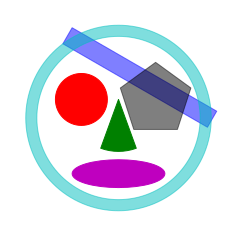

In [2]:
plt.figure(figsize=(4,4))  # set size of the figure

ax = plt.subplot(111)      # create an axes object
plt.axis('equal')          # equalize units on the x- and y-axis
plt.xlim(-3,3)             # set the range of the x-axis

# define a circle patch
circle_patch = patches.Circle(
                        (-1, 0.5),         # coordinates of the center
                        radius = 0.7,      # radius
                        color = 'r',       # color
                        alpha = 1          # transparency
                       ) 


# define a rectangle patch
rectangle_patch = patches.Rectangle(
                         (-1.5, 2),        # coordinates of the lower left corner
                         width = 4.5,      # width
                         height = 0.5,     # height
                         color = 'b',      # color
                         angle = -30,      # angle of rotation in degrees
                         alpha = 0.5       # transparency
                        )

# define an ellipse patch
ellipse_patch = patches.Ellipse(        
                         (0, -1.5),        # coordinates of the center
                         width = 2.5,      # width
                         height = 0.75,    # height
                         color = 'm',      # color
                        )

# define a regular polygon patch
regpoly_patch = patches.RegularPolygon(
                         (1, 0.5),         # coordinates of the center
                         numVertices = 5,  # number of vertices
                         radius = 1,       # radius
                         color = 'k',      # color
                         alpha = 0.5       # transparency
                        )

# define a wedge patch
wedge1_patch = patches.Wedge(
                         (0, 0.5),         # coordinates of the center
                         r = 1.4,          # radius
                         theta1 = 250,     # initial angle in degrees
                         theta2 = 290,     # terminal angle in degrees
                         color = 'g',      # color
                        )

# another wedge patch
wedge2_patch = patches.Wedge(
                         (0, 0),           # coordinates of the center   
                         r = 2.5,          # radius
                         width = 0.3,      # width of the wedge
                         theta1 = 0,       # initial angle in degrees
                         theta2 = 360,     # terminal angle in degrees
                         color = 'c',      # color
                         alpha = 0.5,      # transparency
                        )
 
# add each patch to the axes object    
ax.add_patch(circle_patch)
ax.add_patch(ellipse_patch) 
ax.add_patch(rectangle_patch)
ax.add_patch(regpoly_patch)
ax.add_patch(wedge1_patch)
ax.add_patch(wedge2_patch)

plt.axis('off')

plt.show()

A patch consists of an edge and an interior. The ``color``
parameter sets the same color for both of these components. We can also
specify colors separately for the edge and the interior using
``edgecolor`` and ``facecolor`` parameters. In addition, the
``linewidth`` parameter lets us set the width of the edge:

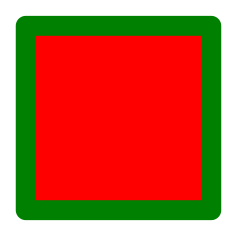

In [3]:
sq_patch = patches.Rectangle(
                         (0, 0),         # coordinates of the lower left corner
                         width = 1,         # width
                         height = 1,        # height
                         edgecolor = 'g',   # color of the edge
                         facecolor = 'r',   # color of the interior
                         linewidth = 20     # width of the edge
                        )


plt.figure(figsize=(4,4))
ax = plt.subplot(111)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.axis('off')

ax.add_patch(sq_patch)

plt.show()

## Patch collections

If we are plotting a large number of shapes, it is more efficient to organize
them into a *patch collection* and then add the whole collection to the
axes object at once instead of adding one patch at a time. To do it we
need to import first the `PatchCollection` function from the
`collections` submodule of `matplotlib`:

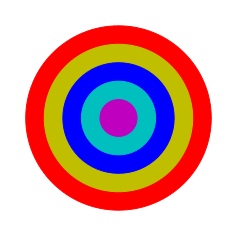

In [4]:
from matplotlib.collections import PatchCollection

plt.figure(figsize=(4,4))  

ax = plt.subplot(111)        
plt.xlim(-6,6)             
plt.ylim(-6,6)  

# create a list of circle patches
circle_list = []
for i in range(5, 0, -1):
    circle_list.append(patches.Circle((0,0), radius = i))

#create a patch collection from the list  
p_collection = PatchCollection(
                               circle_list,                         # list of patches
                               color = ['r', 'y', 'b', 'c', 'm']    # list of colors
                              )


# add the patch collection to the axes object
ax.add_collection(p_collection)

plt.axis('off')

plt.show()

## Using color maps

When we are plotting a several objects, it may become difficult to
specify the color of each object separately, and even more difficult to
choose colors so that the whole plot looks well. To help with this task
the `cm` subodule of `matplotlib` defines several color maps. A
color map is a set of colors, each assigned to a parameter between 0 and 1. 
By selecting a value of the parameter we can pick a color from the
color map:

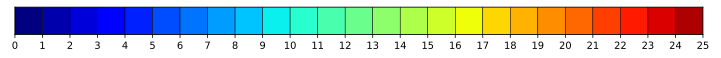

In [5]:
import matplotlib.cm as cm  # import the cm submodule

num_sq = 25                # the number of squares to plot

plt.figure(figsize=(0.5*num_sq,0.5))     

ax = plt.subplot(111)  
plt.yticks([])
plt.xticks(range(num_sq+1))            
plt.ylim(0,1)
plt.xlim(0,num_sq)

# create a list of colors using the jet color map 
cl = [(i/num_sq) for i in range(num_sq)]
color_list = cm.jet(cl)  

patch_list = [patches.Rectangle((i, 0), width=1, height=1) for i in range(num_sq)]
collection  = PatchCollection(patch_list, 
                              facecolor = color_list,   # colors of interiors of patches
                              edgecolor = 'k',          # color of edges of patches
                              linewidth = 0.5           # width of edges of patches
                             )  
                                       
ax.add_collection(collection)
    
plt.show()

The example above uses the `jet` color map. The are many other color
maps defined in the `cm` submodule: `inferno`, `plasma`,
`spring`, `rainbow` etc. See [matplotlib documentation](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for the full list.